In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

Matplotlib is building the font cache; this may take a moment.


## Efficiency plots

In [3]:
def overhead(t_s, e_p):
  return t_s*((1/e_p)-1)

print(overhead(144, 0.8))

36.0


In [4]:
openmp = pd.DataFrame({'p': [1, 2, 4, 8, 16, 32],
                   't_s': [144.867, 144.867, 144.867, 144.867, 144.867,144.867],
                   't_p': [144.867, 147.441, 150.526, 164.496, 185.358,186.725]
                  })

openmp['E_p'] = openmp['t_s']/openmp['t_p']
openmp['t_o'] = overhead(openmp['t_s'],openmp['E_p'])

openmp['Algorithm'] = 'OpenMP'

hybrid = pd.DataFrame({'p': [1, 2, 4, 8, 16, 32],
                   't_s': [144.188, 144.188, 144.188, 144.188, 144.188,144.188],
                   't_p': [144.188, 144.736, 149.277, 164.893, 166.752,169.727]
                  })

hybrid['E_p'] = hybrid['t_s']/hybrid['t_p']
hybrid['t_o'] = overhead(hybrid['t_s'],hybrid['E_p'])

hybrid['Algorithm'] = 'MPI'

hybrid

df = openmp.append(hybrid)
df

,p,t_s,t_p,E_p,t_o,Algorithm
0,1,144.867,144.867,1.000000,0.000,OpenMP
1,2,144.867,147.441,0.982542,2.574,OpenMP
2,4,144.867,150.526,0.962405,5.659,OpenMP
3,8,144.867,164.496,0.880672,19.629,OpenMP
4,16,144.867,185.358,0.781552,40.491,OpenMP
5,32,144.867,186.725,0.775831,41.858,OpenMP
0,1,144.188,144.188,1.000000,0.000,MPI
1,2,144.188,144.736,0.996214,0.548,MPI
2,4,144.188,149.277,0.965909,5.089,MPI
3,8,144.188,164.893,0.874434,20.705,MPI


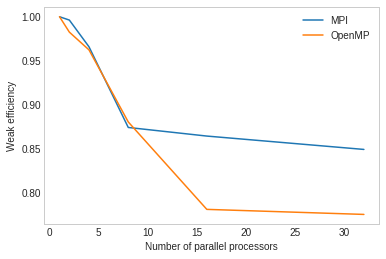

In [5]:
#define index column
new_style = {'grid': False}
plt.rc('axes', **new_style)
df.set_index('p', inplace=True)

#group data by product and display sales as line chart
df.groupby('Algorithm')['E_p'].plot(style='-',legend=True)

plt.xlabel('Number of parallel processors')
plt.ylabel('Weak efficiency')
plt.savefig('WeakEfficiency.svg', dpi = 2000)